# Netflix & Menstruation Correlation Analysis 

This project explores the relationship between Netflix viewing habits and the menstrual cycle, analyzing whether genre preferences and self-reported comfort levels shift during menstruation. Through data visualization and statistical analysis, it reveals personal patterns in emotional well-being and media consumption.


In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set(style='whitegrid')

In [227]:
# Load and clean Netflix data
netflix_df = pd.read_excel('Netflix_History_excel.xlsx')
netflix_df.rename(columns={
    'Genre(Comedy/Romance/Horror/Action/Documentary/Animation)': 'Genre'
}, inplace=True)
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], format='%m/%d/%y')
netflix_df['Genre'] = netflix_df['Genre'].str.strip()

# Load and merge menstruation data
menstruation_df = pd.read_excel('Menstruation Cycle Data.xlsx')
merged_df = pd.merge(netflix_df, menstruation_df, on='Date', how='left')
merged_df['Menstruation Cycle(Yes/No)'] = merged_df['Menstruation Cycle(Yes/No)'].fillna('no')
merged_df.head()

,Title,Date,Genre,Comfort Level(out of 10),Menstruation Cycle(Yes/No)
0,Aşk Peşinde Bir Yıl,2025-04-11,Romance,8,no
1,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes
2,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes
3,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes
4,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes


## Top 10 Shows Watched During vs. Outside Menstruation

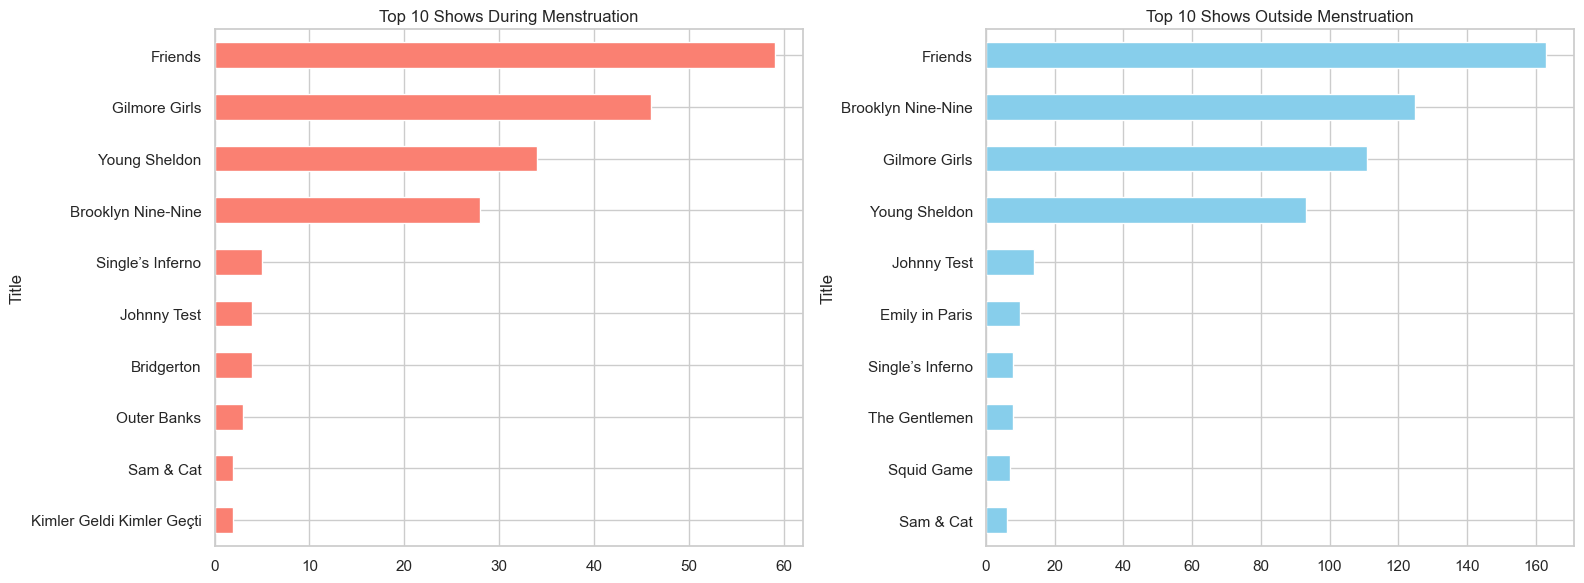

In [228]:
top_during = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='yes']
              .groupby('Title')
              .size()
              .sort_values(ascending=False)
              .head(10))

top_not = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='no']
           .groupby('Title')
           .size()
           .sort_values(ascending=False)
           .head(10))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
top_during.plot(kind='barh', ax=axes[0], color='salmon')
axes[0].set_title('Top 10 Shows During Menstruation')
axes[0].invert_yaxis()
top_not.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Shows Outside Menstruation')
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()

## Genre Preference Ratios

In [229]:
genre_pct_during = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='yes']['Genre']
                     .value_counts(normalize=True) * 100)
genre_pct_not = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='no']['Genre']
                  .value_counts(normalize=True) * 100)
genre_ratio = pd.concat([genre_pct_during, genre_pct_not], axis=1)
genre_ratio.columns = ['% During Menstruation', '% Not During Menstruation']
genre_ratio['Difference (%)'] = genre_ratio['% During Menstruation'] - genre_ratio['% Not During Menstruation']
genre_ratio = genre_ratio.fillna(0)
genre_ratio

,% During Menstruation,% Not During Menstruation,Difference (%)
Comedy,87.113402,86.979167,0.134235
Romance,7.216495,6.076389,1.140106
Action,2.577320,1.388889,1.188431
Animation,2.061856,3.472222,-1.410367
Documentary,1.030928,0.347222,0.683706
Horror,0.000000,1.215278,0.000000
Drama,0.000000,0.520833,0.000000


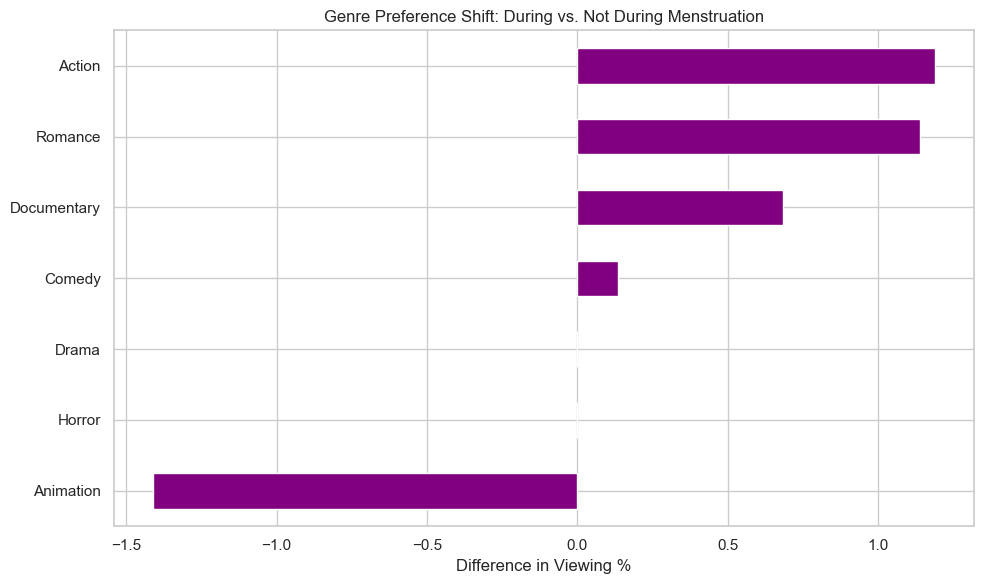

In [230]:
plt.figure(figsize=(10,6))
genre_ratio['Difference (%)'].sort_values().plot(kind='barh', color='purple')
plt.title('Genre Preference Shift: During vs. Not During Menstruation')
plt.xlabel('Difference in Viewing %')
plt.tight_layout()
plt.show()

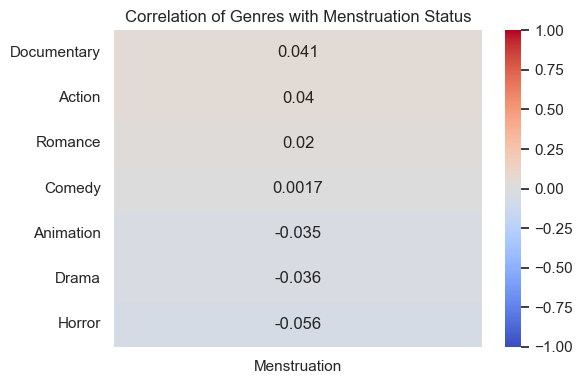

In [231]:
# Encode genres and compute correlations with menstruation status
genre_encoded = pd.get_dummies(merged_df['Genre'])
genre_corr_df = pd.concat([
    genre_encoded,
    merged_df['Menstruation Cycle(Yes/No)'].map({'yes': 1, 'no': 0}).rename('Menstruation')
], axis=1)
corr_matrix = genre_corr_df.corr()
genre_corr = corr_matrix[['Menstruation']].drop('Menstruation').sort_values(by='Menstruation', ascending=False)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Genres with Menstruation Status')
plt.tight_layout()
plt.show()

## 
The correlations are all very weak, but it can be commented that  Horror and Drama are slightly avoided during menstruation and leaned a bit more toward Documentaries or Action.

## Conclusion
This graph shows how your viewing preferences for each genre change when you are on your period compared to when you're not. Each bar represents a genre. The length and direction of the bar shows how much more or less often that genre was watched during menstruation compared to outside menstruation, as a percentage of total viewing.

**-Meaning of Positive values (right of zero)**
You watched that genre more frequently during menstruation
Example: If Romance has +6%, it means you watched Romance 6% more often (proportionally) during your period.

**-Meaning of Negative values (left of zero)**
You watched that genre less frequently during menstruation
Example: If Action has -4%, it means you watched Action 4% less during your period.
This chart helps identify emotional or comfort-based trends in your viewing habits:
You might seek comfort genres (like Comedy or Romance) during your period.
You might avoid intense genres (like Horror or Action) when you're less comfortable.
Even if the Chi-squared test showed no statistical significance, these shifts can still be personally meaningful and insightful for emotional well-being.

- Identified most-watched shows by menstrual phase.
- Compared genre frequencies and visualized changes in preferences.
- This analysis highlights how mood or comfort-seeking might influence genre choices.

## Chi-Squared Test Result
To determine whether there is a statistically significant relationship between menstruation status and genre preference, we performed a Chi-Squared Test of Independence.

- **Chi-squared Statistic:** 7.11
- **p-value:** 0.31

### Interpretation:
Since **p = 0.31** is greater than the standard threshold of 0.05, we **fail to reject the null hypothesis**.
This means:
**There is no statistically significant relationship between genre preference and menstruation status** in this dataset.

While there are small shifts in genre tendencies (e.g., more comedy or romance during menstruation), they are **not statistically strong enough** to confirm a meaningful difference.

These findings are still insightful for personal reflection and might become statistically relevant with a larger or longer-term dataset.

In [232]:
# Calculate mean, variance, and standard deviation of comfort levels
# grouped by menstruation status

comfort_stats_by_cycle = merged_df.groupby("Menstruation Cycle(Yes/No)")["Comfort Level(out of 10)"].agg(["mean", "var", "std"])
comfort_stats_by_cycle.rename(columns={
    "mean": "Mean",
    "var": "Variance",
    "std": "Standard Deviation"
}, inplace=True)

comfort_stats_by_cycle


,Mean,Variance,Standard Deviation
Menstruation Cycle(Yes/No),,,
no,8.348958,1.806712,1.344140
yes,8.345361,1.336066,1.155883


## Comfort Level Statistics By Menstruation Status

The average comfort level is almost identical in both conditions. There's slightly more variability in comfort on non-menstruation days.


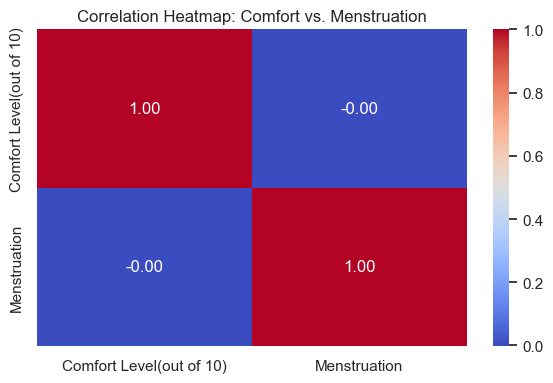

In [233]:
# Correlation heatmap between comfort level and menstruation status
df_corr = merged_df.copy()
df_corr['Menstruation'] = df_corr['Menstruation Cycle(Yes/No)'].map({'yes': 1, 'no': 0})
numeric_cols = ['Comfort Level(out of 10)', 'Menstruation']
corr_matrix = df_corr[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Comfort vs. Menstruation')
plt.tight_layout()
plt.show()

## 
The correlation between comfort level and menstruation is about 0. It can be commented that menstruation does not influence how comfortable felt while watching Netflix. This aligns with the average comfort levels during menstruation and not. The averages are quite similar, so no linear relationship between comfort level and menstruation status.

In [234]:
# Comfort level statistics by genre
comfort_by_genre = merged_df.groupby("Genre")["Comfort Level(out of 10)"].agg(["mean", "var", "std"])
comfort_by_genre.rename(columns={
    "mean": "Mean",
    "var": "Variance",
    "std": "Standard Deviation"
}, inplace=True)

comfort_by_genre


,Mean,Variance,Standard Deviation
Genre,,,
Action,4.461538,0.769231,0.877058
Animation,7.791667,0.867754,0.931533
Comedy,8.740299,0.222439,0.471635
Documentary,4.500000,0.333333,0.577350
Drama,3.000000,0.000000,0.000000
Horror,2.000000,0.000000,0.000000
Romance,5.836735,1.556122,1.247446


## Comfort Level by Genre: Analysis and Insights
Based on your self-reported **Comfort Level (out of 10)**, we analyzed how each genre affects your comfort.

### Key Findings:
- **Comedy (8.74)** and **Animation (7.79)** are the most comforting genres.
- **Horror (2.00)** and **Drama (3.00)** result in the lowest comfort levels.
- **Romance** falls in the middle, suggesting it can be both soothing and emotionally stirring.
- **Action** and **Documentary** have below-average comfort scores, possibly due to their intensity or serious themes.

These insights suggest that your comfort-seeking viewing behavior aligns with lighter, more humorous content during emotionally sensitive times like menstruation.
